# Example 10.5 Dynamic wind load on a tall building


### Structure

We consider a tall building modelled as an equivalent cantilever beam. We may consider the two first modes of the building in this example, although we have to do one mode a time.

<img src="./figures/Tall_building_wind.svg">

The mode shapes are given by:

$$
\phi_1(x)=\left( \dfrac{x}{L} \right)^3
$$

$$
\phi_2(x)=4  \left( \dfrac{x}{L} \right)^2-5  \left( \dfrac{x}{L} \right)^3
$$

These modes both have modal mass $\tilde{m}=10^6$ kg and damping $\xi=0.5$%, and their natural frequencies are $0.3$ Hz and $1$ Hz.

### Distributed wind load

The distributed (linearized) wind load is given by:

$$q(x,t)=\rho D C_D V u(x,t) - \rho D C_D V \dot{r}_y(x,t) + \dfrac{1}{2} \rho D C_D V^2$$

We recognize that this contains a turbulence term, a motion-induced term, and a static term. We disregard the static load in the following.

We assume the structural response can be considered mode-by-mode, and calculate for a single mode here: ${r}_y(x,t)=\phi(x) z(t)$.

The modal equation of motion is:

$$
\ddot{z}(t)+2\omega_n \xi \dot{z}(t)+\omega_n^2 z(t)=\dfrac{1}{\tilde{m}} \int_0^L q(x,t) \phi(x) \: \text{d} x
$$

We have to deal with the integral $ \int_0^L q(x,t) \phi(x) \: \text{d} x$.

### Spectrum of dynamic (turbulent) wind load:

We first consider the part of the load related to the turbulence $u(x,t)$. The modal load is the load integrated over the span (times the mode shape):

$$\tilde{q}(t)=
\dfrac{1}{\tilde{m}}
 \int_0^L \rho D C_D V \: u(x,t) \: \phi(x) \: \text{d} x
$$

The auto correlation of the modal load is:

$$
\begin{align}
R_{\tilde{q}}(\tau) &= E\left[\tilde{q}(t) \tilde{q}(t+\tau) \right]  \\
&=
\left( \dfrac{\rho D C_D V}{\tilde{m}} \right)^2
E\left[\int_{0}^{L}\int_{0}^{L} u(x,t) \phi(x_1) u(x+ \Delta x,t+\tau) \phi(x_2) \, \text{d}x_1 \, \text{d}x_2\right] \\
&=
\left( \dfrac{\rho D C_D V}{\tilde{m}} \right)^2
\int_{0}^{L} \int_{0}^{L} \phi(x_1) \phi(x_2) R_{u_1 u_2}(\tau, \Delta x) \, \text{d}x_1 \, \text{d}x_2
\end{align}
$$

Using the Fourier transform to the equation above, the auto spectral density of the modal load is:

$$
S_{\tilde{q}}(\omega)=
\left( \dfrac{\rho D C_D V}{\tilde{m}} \right)^2
\int_{0}^{L} \int_{0}^{L} \phi(x_1) \phi(x_2) S_{u_1 u_2}(\omega, \Delta x) \, \text{d}x_1 \, \text{d}x_2
$$


We recognize $ S_{u_1 u_2}(\omega, \Delta x)$ as the cross-spectral density of the turbulence in two points:


$$
S_u(\omega, \Delta x)=S_u(\omega) \text{Coh}(\omega, \Delta x)
$$

where is the single-point (auto) spectrum and $ \text{Coh}(\omega, \Delta x)$ is the coherence function.




### Define problem parameters

We introduce some parameters for the structure and wind field.


In [245]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

# Define problem parameters
rho=1.2 # Air density
D=20 # Building width
C_D=1.2 # Drag coefficient
L=300 # Height of building
m_modal=1e6 # Modal mass

xLu=200.0/5 # Length scale
Au=5.0 # Spectral parameter
V=30.0 # Mean wind velocity
Iu=0.10 # Turbulence intensity
Ku=10.0 # Coherence parameter

# Turbulence spectrum, Kaimal type
def S_u(omega):

    omega_u=omega*xLu/V
    sigma_u=V*Iu
    Su = (sigma_u)**2 /omega*(Au/(2*np.pi))*omega_u/((1+1.5*(Au/(2*np.pi))*omega_u)**(5.0/3.0))
    
    return Su

# Coherence function
def Coh(omega,delta_x):
    return np.exp(-Ku*delta_x*omega/(2*np.pi)/V)

# Define mode shape
def phi(x):
    return (x/L)**3 # Mode 1
    #return 4*(x/L)**2-5*(x/L)**3 # Mode 2

# Cross spectral density
def S_u1_u2(omega,delta_x):
    return S_u(omega)*Coh(omega,delta_x)


### Plot mode shape

Text(0.5, 1.0, 'Mode shape')

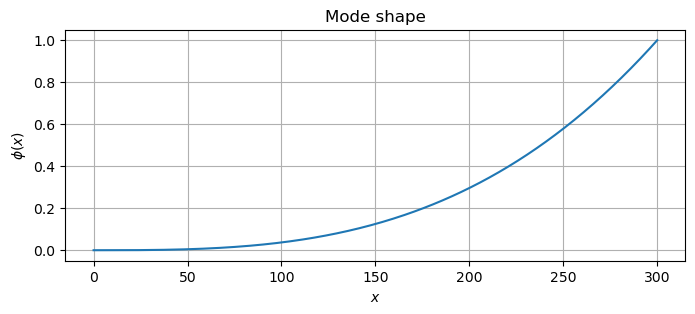

In [246]:
plt.figure(figsize=(8,3))    
plt.plot(x1,phi(x1))
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x)$')
plt.grid()
plt.title('Mode shape')

### Calculate double integral for modal load

We now calculate $$
S_{\tilde{q}}(\omega)=
\left( \dfrac{\rho D C_D V}{\tilde{m}} \right)^2
\int_{0}^{L} \int_{0}^{L} \phi(x_1) \phi(x_2) S_{u_1 u_2}(\omega, \Delta x) \, \text{d}x_1 \, \text{d}x_2
$$ numerically. The integral has to be solved for each $\omega$ in our frequency vector.


In [247]:

x1 = np.linspace(0, L, 300)  # Adjust grid size for accuracy
x2 = np.linspace(0, L, 300)
X1, X2 = np.meshgrid(x1, x2)
Delta_x = np.abs(X1 - X2) # All combinations of x1 and x2 as an array

omega=np.linspace(0.01,10,300) # Frequency axis
integral_values=np.zeros_like(omega) # Empty vector to save calculated integral value
integrand=[None]*len(omega) # Empty list to save integrand for plotting

# Loop over frequencies
for k in np.arange(len(omega)):
    integrand[k] = phi(X1) * phi(X2) * S_u1_u2(omega[k],Delta_x)
    integral_values[k] = np.trapz(np.trapz(integrand[k], x2), x1)

Sq_modal = 1/m-_modal**2*(rho*D*C_D*V)**2*integral_values

# Plot integrand
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,6))

surf = ax.plot_surface(X1, X2, integrand[50].T, cmap=cm.coolwarm,linewidth=0.1, antialiased=False)
ax.view_init(30,250)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$');
ax.set_zlabel(r'$\phi(x_1)*\phi(x_2)*S_q(\omega,\Delta x)$');
ax.set_title('Integrand for $\omega=$' + '{:.3f}'.format(omega[50]) )

fig.colorbar(surf, shrink=0.3, aspect=10)

# Plot modal load
plt.figure(figsize=(8,3))    
plt.plot(omega,Sq_modal)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$R_{q}(\omega)$')
plt.grid()
plt.yscale('log')
plt.title('Modal load spectrum')


NameError: name 'm' is not defined

### Aerodynamic damping

We next consider the part of the load related to motion-induced effects:

$$
-\dfrac{1}{\tilde{m}}
 \int_0^L \rho D C_D V \: \dot{r}_y(x,t) \: \phi(x) \: \text{d} x =
-\dfrac{1}{\tilde{m}}
 \int_0^L \rho D C_D V \:\phi(x) \dot{z}(t) \: \phi(x) \: \text{d} x =
-\dfrac{1}{\tilde{m}}
 \int_0^L \rho D C_D V \:\phi(x) \: \phi(x) \: \text{d} x \:\: \dot{z}(t) 
$$

Here, the integral is equal to the modal aerodynamic damping:

$$
\tilde{c}_{ae}=
-\dfrac{1}{\tilde{m}}
 \int_0^L \rho D C_D V \:\phi(x)^2 \: \text{d} x  
$$


In [ ]:

cae_modal=-1/m_modal*rho*D*C_D*V*np.trapz(phi(x1)**2,x1)


### Response spectrum

The modal frequency response function is now
$$\tilde{H}(\omega) = \frac{1}{-\omega^2+i\omega \left(2\omega_n \xi-\tilde{c}_{ae} \right) + \omega_n^2} $$

The auto-spectral density of the modal response is:

$$S_{z}(\omega) = |\tilde{H}(\omega)|^2 S_{\tilde{q}}(\omega)$$ 

And the response at the top of the building is:

$$S_{r_y}(\omega) = \phi(x=L)^2S_{z}(\omega) =1^2 \cdot S_{z}(\omega) =S_{z}(\omega)$$

In [ ]:

omegan=0.3*2*np.pi # 0.3 Hz, mode 1
#omegan=1*2*np.pi # 1 Hz, mode 2
xi=0.5/100

H_modal=1/(-omega**2+1j*omega*(2*omegan*xi-cae_modal)+omegan**2)
H_no_cae=1/(-omega**2+1j*omega*(2*omegan*xi)+omegan**2)

plt.figure(figsize=(8,3))
plt.plot(omega,np.abs(H_modal),color='C0',label=('Abs (V = ' + str(V) + ' m/s)'))
plt.plot(omega,np.abs(H_no_cae),color='C6',linestyle='--',label=('Abs (No cae)'))
plt.grid()
plt.xlabel(r'$\omega$')
plt.ylabel(r'$|H(\omega)|$')
plt.legend()


In [ ]:
Sz = np.abs(H_modal)**2*Sq_modal # Auto spectral density of the modal response

Sy = phi(L)**2*Sz # Auto spectral density of the response at the top

plt.figure(figsize=(8,3))
plt.plot(omega,np.real(Sy),label=('Real (V = ' + str(V) + ' m/s)'))
plt.grid()
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_y(\omega)$')
plt.legend()
plt.yscale('log')

In [ ]:
std_y = np.real(np.trapz(Sy,omega))**0.5 # Standard deviation of the response

print('Standard deviation is ' + '{:.2f}'.format(std_y*1000) + ' mm')
